# Intro to Keras: Neural Networks for Digit Classification
* Getting started with Keras: https://keras.io/
* Sequential model guide: https://keras.io/getting-started/sequential-model-guide/

In [1]:
# Import MNIST dataset from Keras

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# Data exploration

print("Inputs shape is " + str(train_x.shape))
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is" + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [3]:
# Input shape: 60000 examples
# Each image: 28 x 28

train_x.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt

5


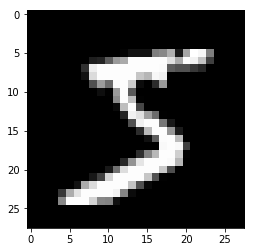

In [5]:
# Visualize the input samples

sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

In [6]:
# flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2]
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

In [7]:
# Normalize pixel values to between 0-1

train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [8]:
import keras

# Use Keras to categorize the outputs ("one-hot" vectors)
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(test_y_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [9]:
from keras.models import Sequential

# Simple neural network model
model = Sequential()

In [10]:
from keras.layers import Dense, Activation

# Add layers to model

# Hidden layer 1: 500 neurons
model.add(Dense(units=500, input_dim=784)) # Dense = fully-connected
model.add(Activation('relu')) # Relu activation

# Hidden layer 2: 250 neurons
model.add(Dense(units=250))
model.add(Activation('relu'))

# Output layer: 10 neurons (one for each class)
model.add(Dense(units=10))
model.add(Activation('softmax')) # Softmax activation: output a probability distribution, between 0-1

In [11]:
# Compile the model, get ready to train

model.compile(loss='categorical_crossentropy',
              optimizer='sgd', # stochastic gradient descent
              metrics=['accuracy'])

In [12]:
# Keras TQDM: progress bar library
from keras_tqdm import TQDMNotebookCallback

In [13]:
# Fit the model to the training data
# 10 epochs, 32 batch size
# Use TQDM progress bar instead of built-in progress bar

model.fit(train_x_flattened, train_y_categorical, epochs=10, \
          batch_size=32, verbose=0, callbacks=[TQDMNotebookCallback()])

Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


Widget Javascript not detected.  It may not be installed or enabled properly.


In [17]:
# Evaluate trained model on test data

loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)

 9472/10000 [===========================>..] - ETA: 0s

In [18]:
# Print out evaluation results
loss_and_metrics

[0.10072198292016983, 0.96960000000000002]

[[  2.75563980e-05   1.83563156e-06   1.07465254e-03   3.07591120e-03
    4.24405044e-07   1.42512172e-05   3.15357029e-09   9.95548010e-01
    2.94716465e-05   2.27831028e-04]]
7


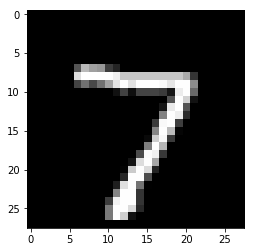

In [22]:
# Make sure our predictions make sense
import numpy as np

sample_num = 0 # which test sample to look at

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # create a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print(predicted_scores)

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print(predicted_class)

# Actual input
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()